Here is the code that provided by previous author in the paper "Drawing an elephant with four complex parameters", by Jurgen Mayer, Khaled Khairy, and Jonathon Howard (2010)

To make the elephant shape, we need to change the parameter list into [50 - 30j, 18 + 8j, 12 - 10j, -14 - 60j, 20 + 20j]

So here is the animated elephant shape

In [ ]:
import matplotlib

matplotlib.use('TKAgg')
from matplotlib import animation
from numpy import append, cos, linspace, pi, sin, zeros
import matplotlib.pyplot as plt

# parameters
#parameters = [50 - 30j, 18 + 8j, 12 - 10j, -14 - 60j, 20 + 20j]
parameters =[30 - 10j, 20 + 20j, 40 + 10j, 20 - 50j, 14 +5j]

def fourier(t, C):
    f = zeros(t.shape)
    for k in range(len(C)):
        f += C.real[k] * cos(k * t) + C.imag[k] * sin(k * t)
    return f


def elephant(t, p):
    npar = 6

    Cx = zeros((npar,), dtype='complex')
    Cy = zeros((npar,), dtype='complex')

    Cx[1] = p[0].real * 1j
    Cy[1] = p[3].imag + p[0].imag * 1j

    Cx[2] = p[1].real * 1j
    Cy[2] = p[1].imag * 1j

    Cx[3] = p[2].real
    Cy[3] = p[2].imag * 1j

    Cx[5] = p[3].real

    x = append(fourier(t, Cy), [p[4].imag])
    y = -append(fourier(t, Cx), [-p[4].imag])

    return x, y


def init_plot():
    # draw the body of the elephant
    # create trunk
    x, y = elephant(linspace(2.9 * pi, 0.4 + 3.3 * pi, 1000), parameters)
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(0)) * parameters[4].real
    trunk.set_data(x, y)
    return trunk,


def move_trunk(i):
    x, y = elephant(linspace(2.9 * pi, 0.4 + 3.3 * pi, 1000), parameters)
    # move trunk to new position (but don't move eye stored at end or array)
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(i)) * parameters[4].real
    trunk.set_data(x, y)
    return trunk,


fig, ax = plt.subplots()
# initial the elephant body
x, y = elephant(t=linspace(0.4 + 1.3 * pi, 2.9 * pi, 1000), p=parameters)
plt.plot(x, y, 'b.')
plt.xlim([-75, 90])
plt.ylim([-70, 87])
plt.axis('off')
trunk, = ax.plot([], [], 'b.')  # initialize trunk

ani = animation.FuncAnimation(fig=fig,
                              func=move_trunk,
                              frames=1000,
                              init_func=init_plot,
                              interval=500,
                              blit=False,
                              repeat=True)

plt.show()

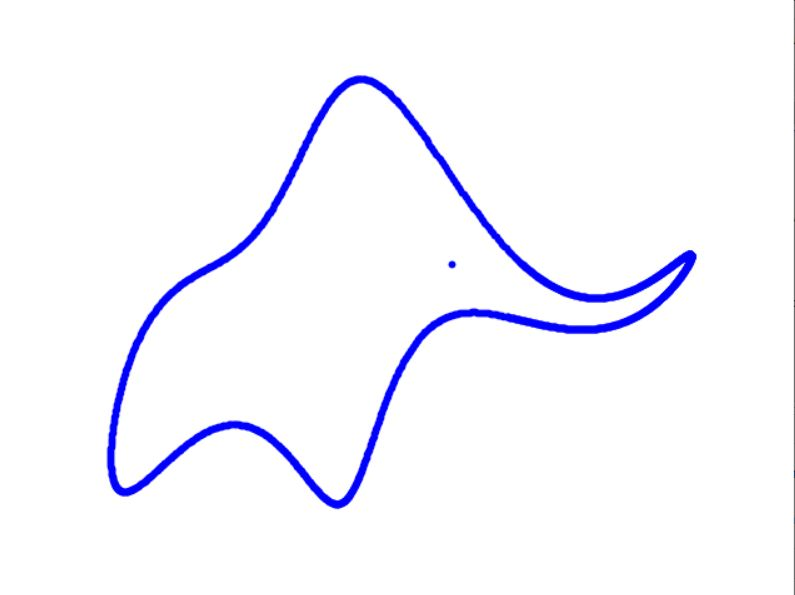

In [6]:
from IPython.display import Image
Image(filename='elephant.jpg') 

Basically just changing the parameter list to change into various other forms

Then we can change the elephant that was previously facing right to facing left by changing a few parameters to [40 + 20j, 18 - 8j, 12 + 10j, -14 + 60j, 20 + 20j] 

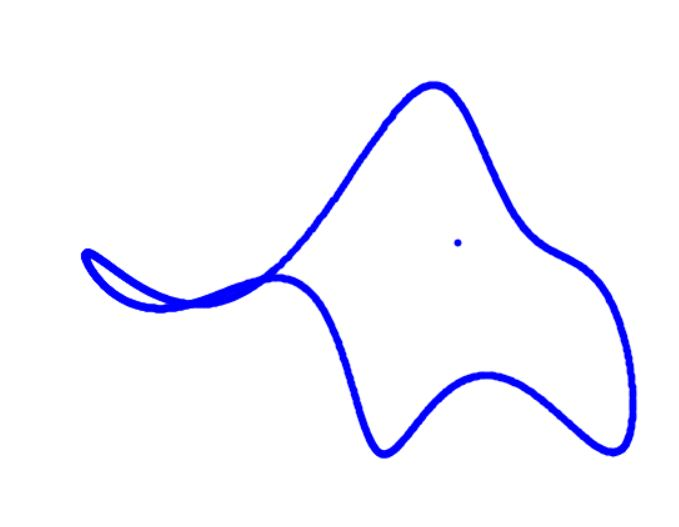

In [9]:
Image(filename='left elephant.jpg')

Make the hippo shape and change the parameter into [50 - 15j, 5 + 2j, -10 - 10j, -14 - 60j, 14 +30j]

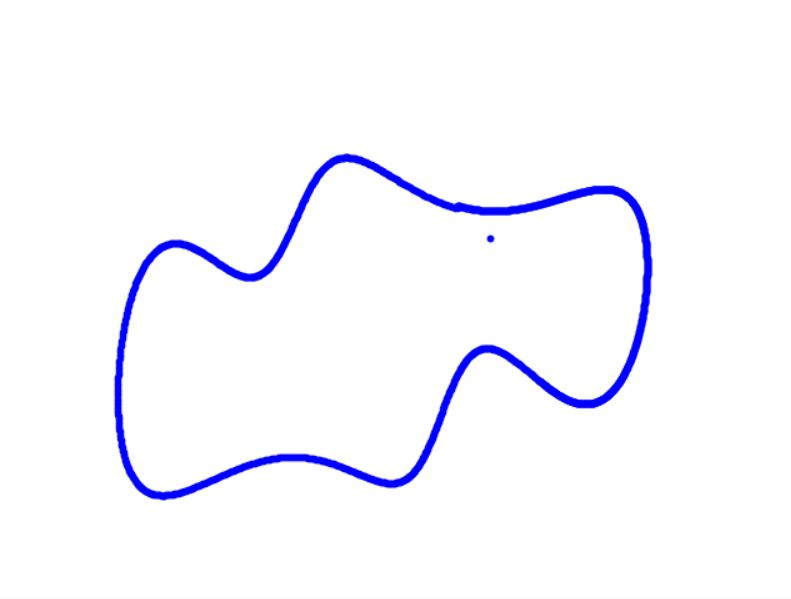

In [8]:
Image(filename='hippo.jpg')

Make the hippo shape and change the parameter into  [30 - 10j, 20 + 20j, 40 + 10j, 20 - 50j, 14 -20j]

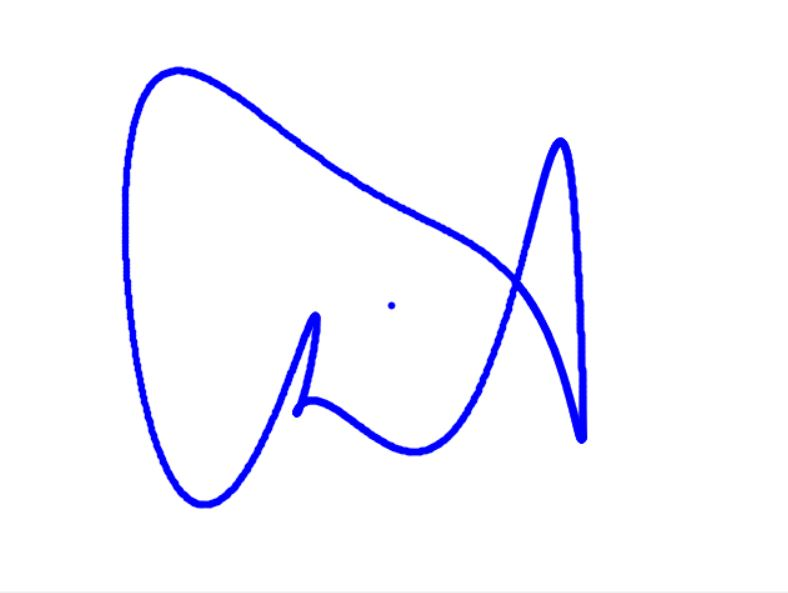

In [7]:
Image(filename='whale.jpg')